In [141]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [105]:
PATH_TRAIN = 'train.csv'
PATH_TEST = 'test.csv'

In [125]:
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


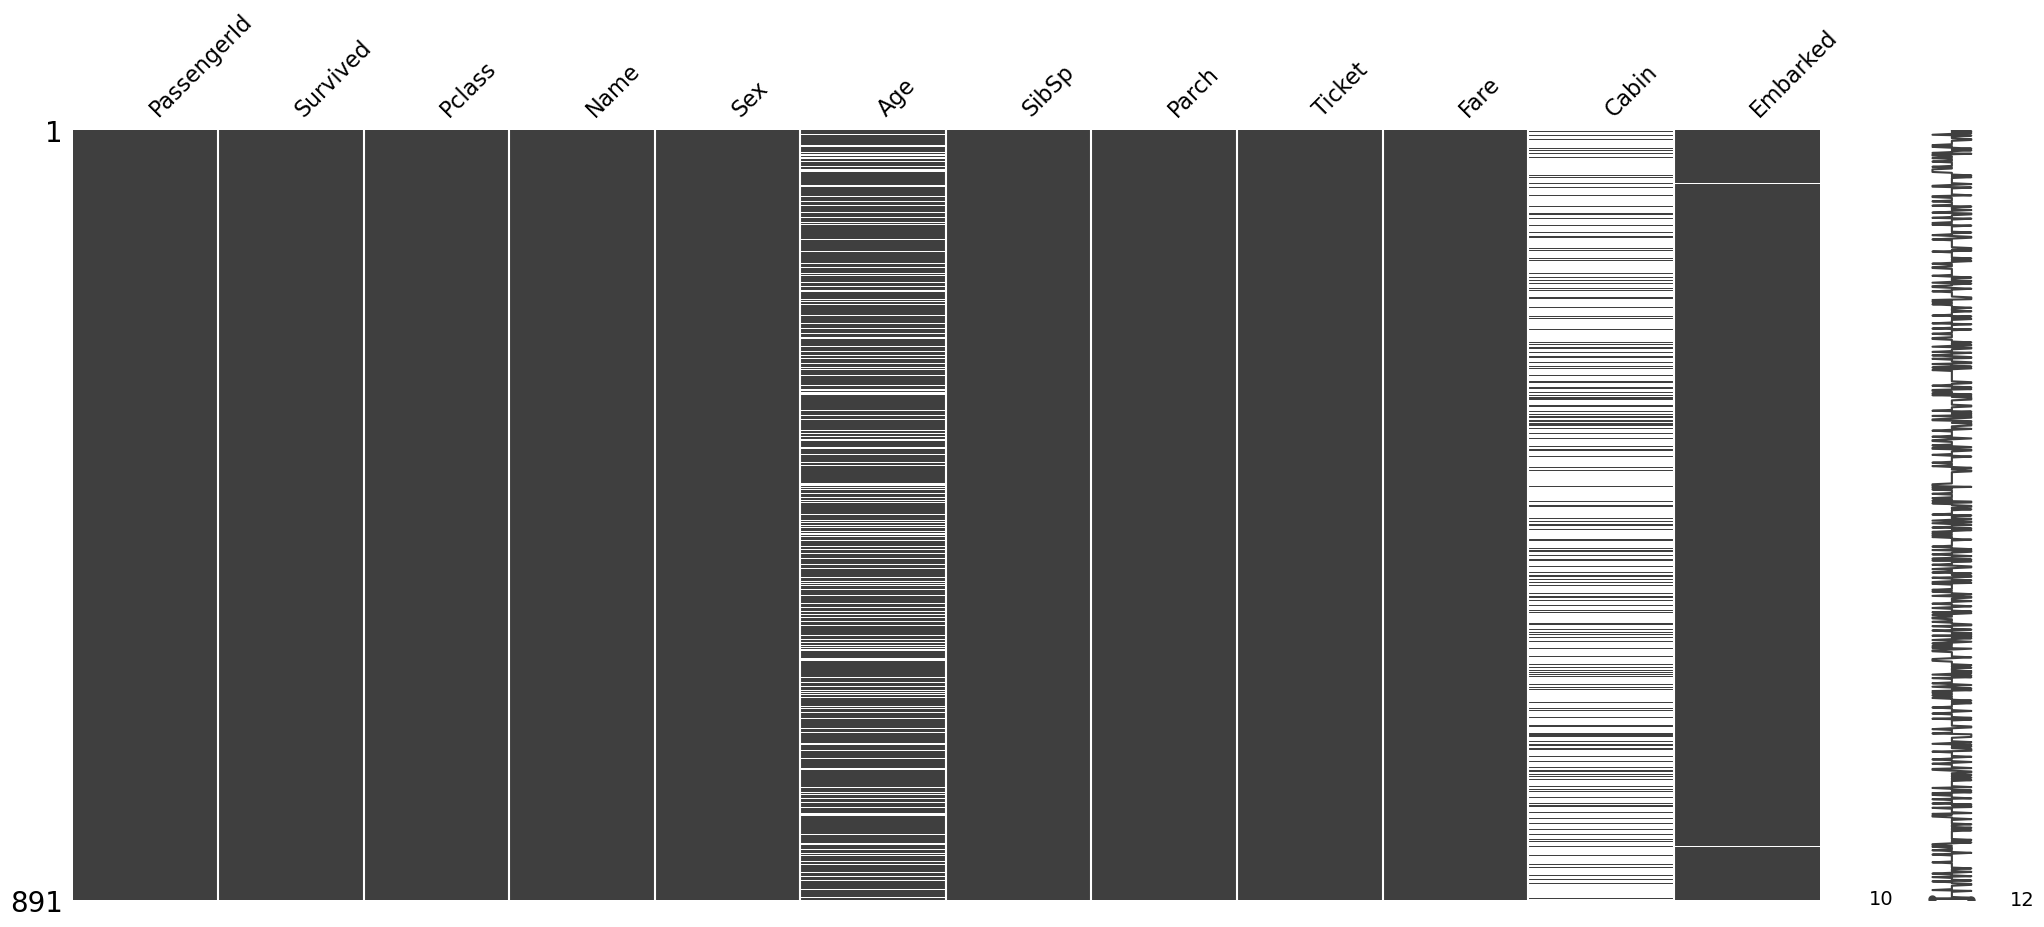

In [117]:
msno.matrix(train);

In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


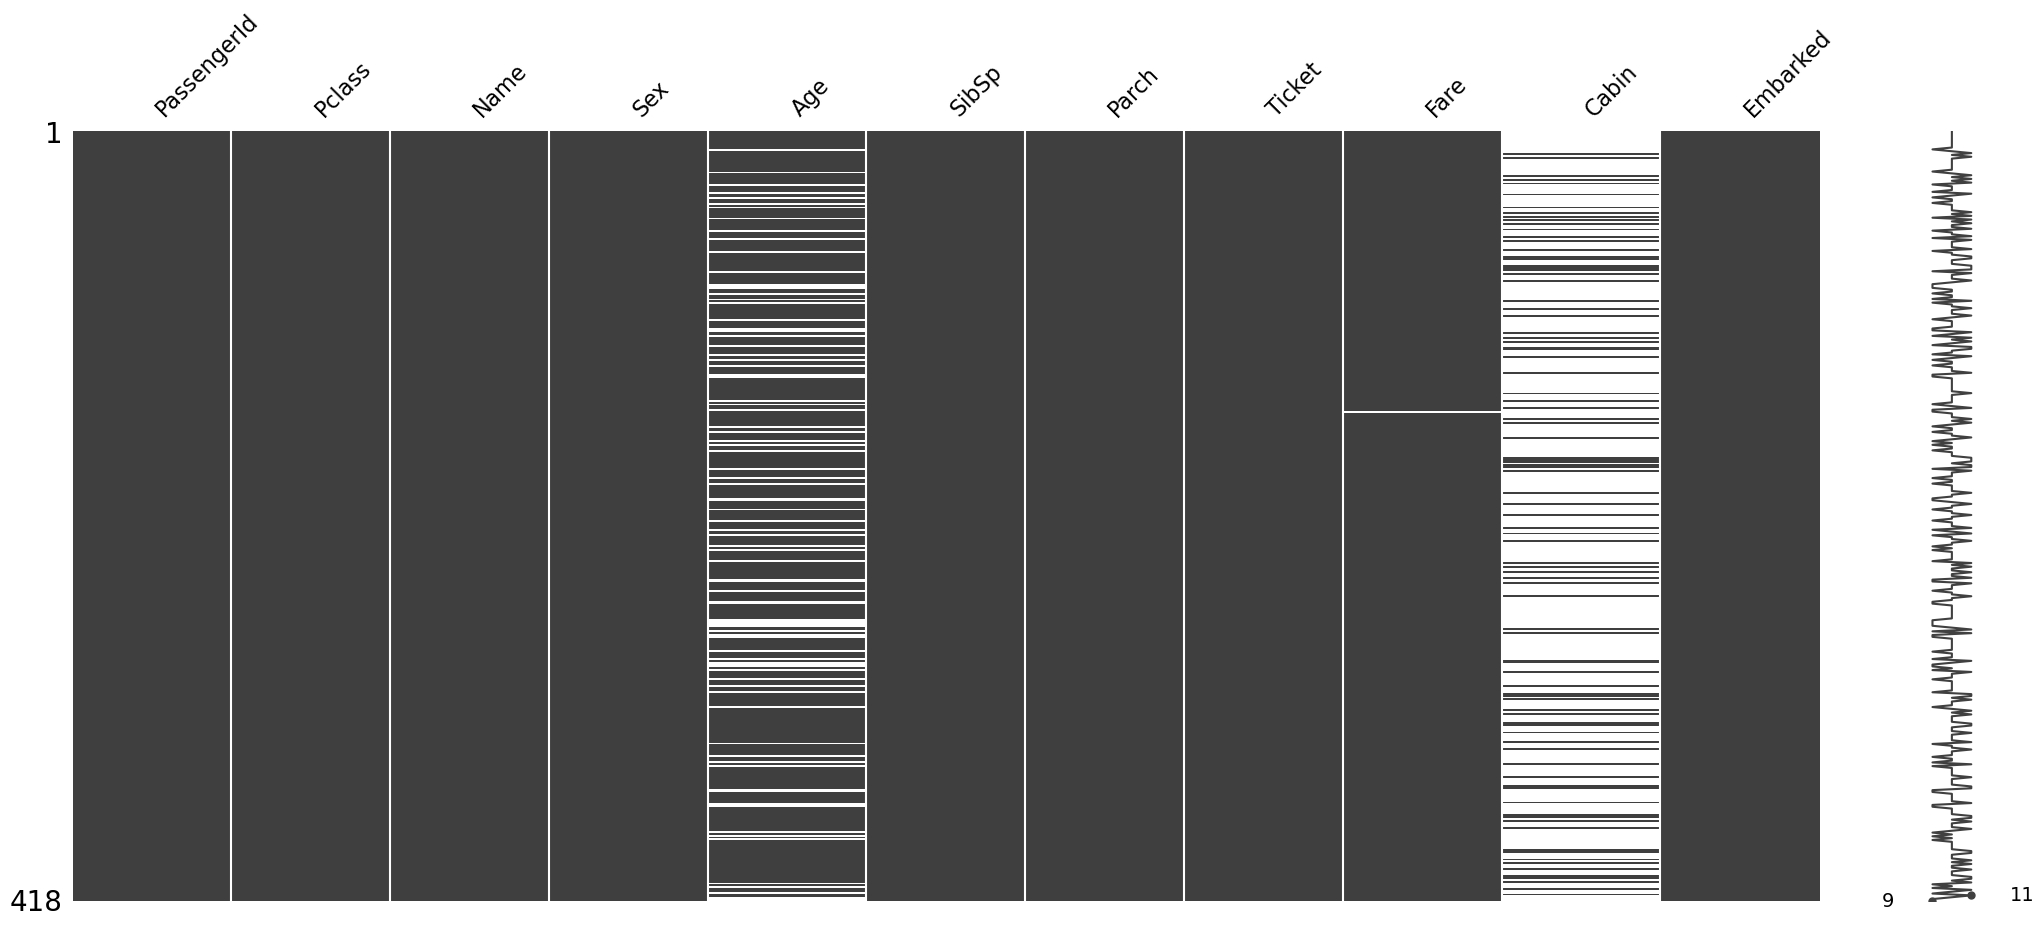

In [120]:
msno.matrix(test);

In [121]:
train_clean = train.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)
test_clean = test.drop(columns=['Name', 'Cabin', 'Ticket'], axis=1)
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [123]:
train_clean[train_clean.duplicated()]['PassengerId'].sum()

0

In [126]:
test_clean[test_clean.duplicated()]['PassengerId'].sum()

0

In [128]:
test_clean[test_clean.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [135]:
test_clean.loc[test_clean.query('PassengerId==1044').index, 'Fare']=test_clean.query('Pclass==3')['Fare'].median()

In [137]:
def input_data(data):
    data_copy = data.copy()
    
    categorials_vars = list(data_copy.select_dtypes(include=['object']).columns.values)
    
    for col in categorials_vars:
        if data_copy[col].isnull().values.any():
            data_copy[col].fillna(data_copy[col].mode()[0], inplace=True)
            
    numerical_vars = list(data_copy.select_dtypes(include=['int64', 'float64']).columns.values)
    
    for col in numerical_vars:
        if data_copy[col].isnull().values.any():
            data_copy[col].fillna(data_copy[col].median(), inplace=True)
            
    return data_copy
    
train_full = input_data(train_clean)
test_full = input_data(test_clean)

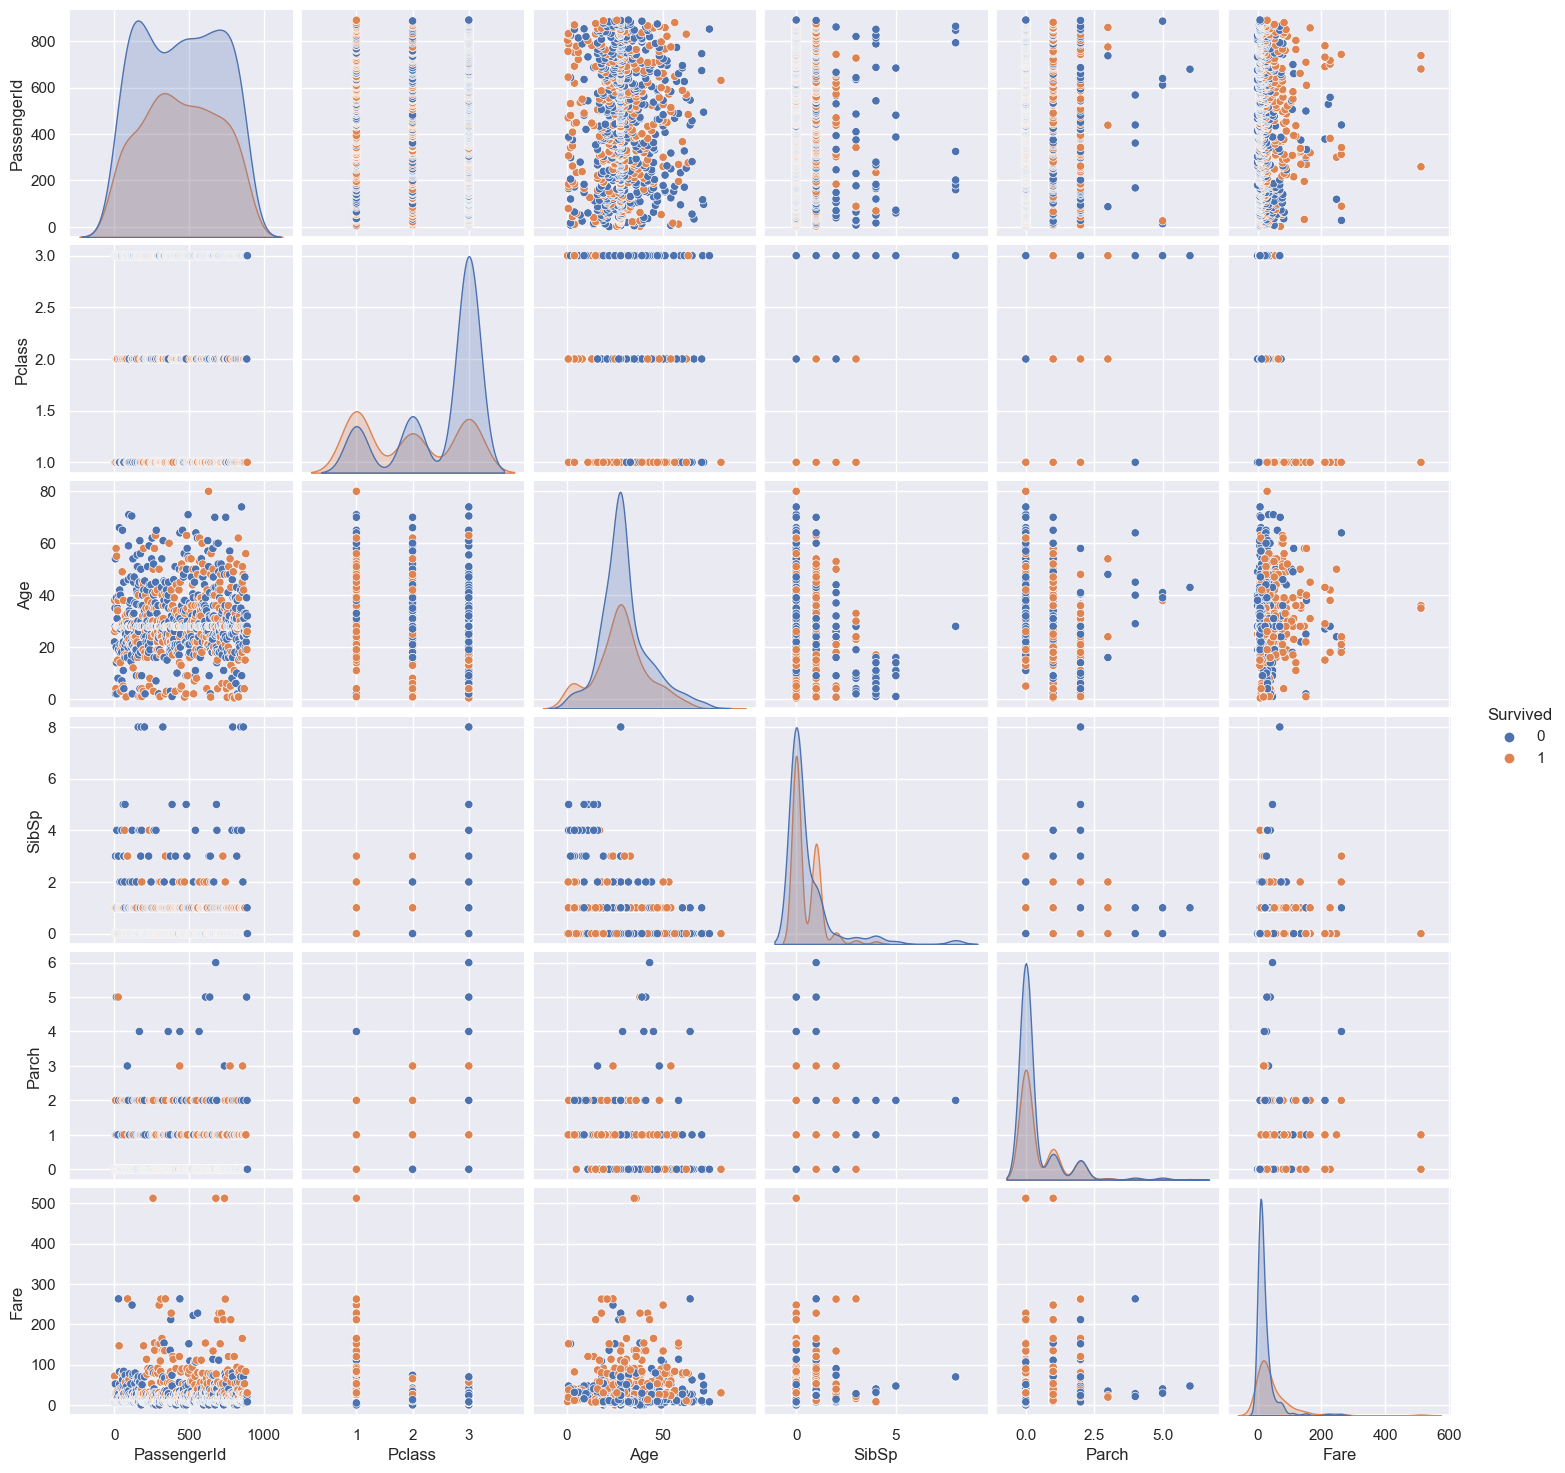

In [161]:
sns.set_theme()
sns.pairplot(data=train_full, hue="Survived");

In [145]:
train_full.groupby(['Sex']).agg({'PassengerId': 'count'})

,PassengerId
Sex,
female,314
male,577


PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

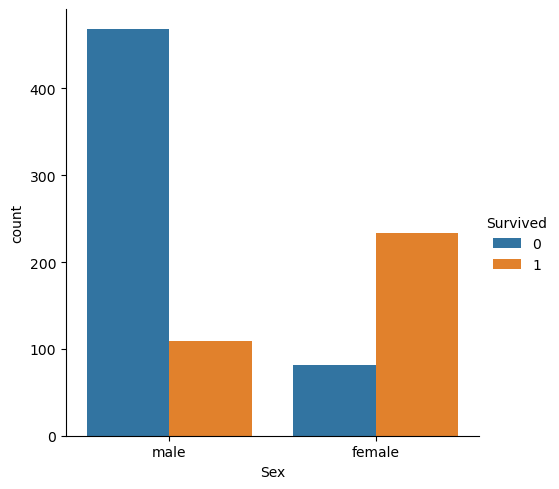

In [150]:
sns.catplot('Sex', data=train_full, hue='Survived', kind='count')
train_full.groupby(['Sex', 'Survived']).agg({'PassengerId': 'count'})

In [152]:
train_full.groupby(['Pclass']).agg({'PassengerId': 'count'})

,PassengerId
Pclass,
1,216
2,184
3,491


PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119

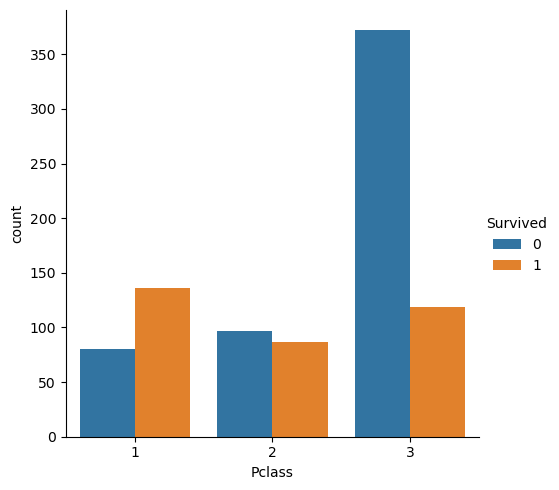

In [151]:
sns.catplot('Pclass', data=train_full, hue='Survived', kind='count')
train_full.groupby(['Pclass', 'Survived']).agg({'PassengerId': 'count'})

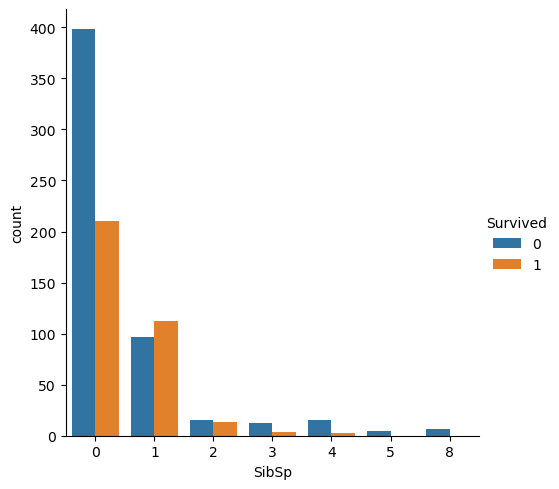

In [154]:
sns.catplot('SibSp', data=train_full, hue='Survived', kind='count');

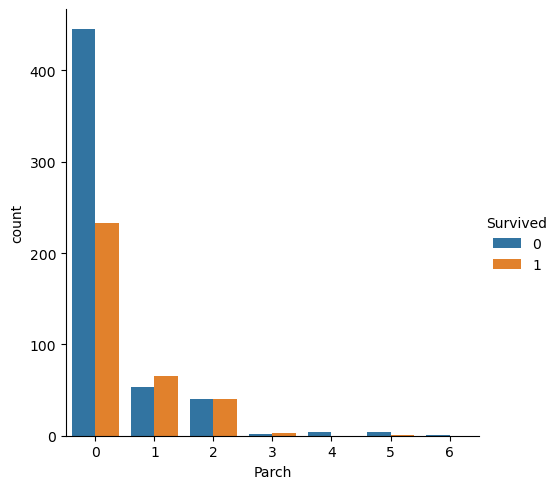

In [156]:
sns.catplot('Parch', data=train_full, hue='Survived', kind='count');

In [20]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
train.query('Age == 0.42')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
803,804,1,3,male,0.42,0,1,8.5167


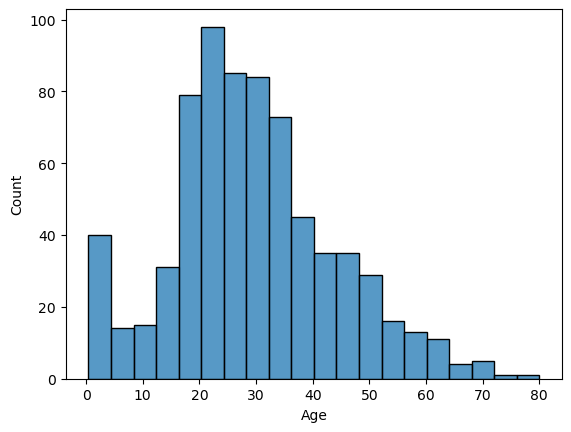

In [28]:
sns.histplot(train.Age, bins=20);

In [62]:
train.query('Age < 18')['PassengerId'].count()

113

In [63]:
train.query('Age < 18 and Survived == 1')['PassengerId'].count()

61

,Sex,PassengerId
0,female,314
1,male,577


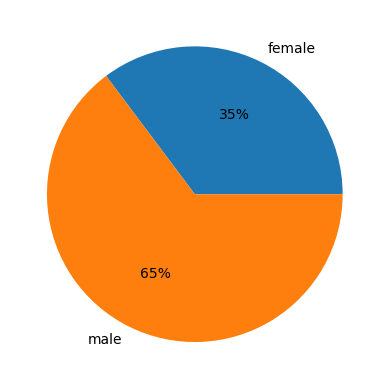

In [54]:
group_sex = train.groupby(['Sex'], as_index=False)[['PassengerId']].nunique()
plt.pie(group_sex.PassengerId, labels=group_sex.Sex, autopct='%.0f%%')
plt.show
group_sex

In [56]:
train.groupby(['Sex', 'Survived'], as_index=False)[['PassengerId']].count()

,Sex,Survived,PassengerId
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109
